## Study List
#### Definition of polynomial function (http://www.mathcentre.ac.uk/resources/uploaded/mc-ty-polynomial-2009-1.pdf)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Load regression_set and plot

Text(0.5, 1.0, 'regression_dataset')

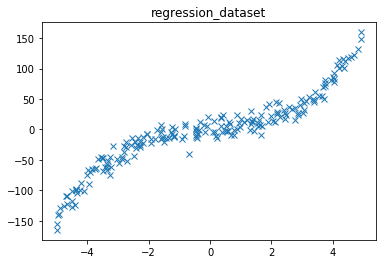

In [2]:
regression_data = np.loadtxt('regression_dataset')
data_x = regression_data[:,0]
data_y = regression_data[:,1] 

plt.figure()
plt.plot(data_x, data_y, 'x')
plt.title('regression_dataset')

In [3]:
def do_regression(data_x, data_y, degree):
    X = np.empty([len(data_x), degree+1])
    Y = np.empty([len(data_y)])
    # for each data point
    for i,x in enumerate(data_x):
        for j in range(degree+1):
            X[i,j] = x**j        # Formulate this again meaning x**0, x**1, x**2, x**3, ....
        Y[i] = data_y[i]
    
    #construct X^T X
    XTX = X.transpose().dot(X)
    
    a = np.linalg.solve(XTX, X.transpose().dot(Y))
    
    fitting_error = (X.dot(a) - Y).dot(X.dot(a) - Y)
    
    return a, fitting_error

## Find Solvable Degree

In [4]:
degree = 0
_, fitting_error = do_regression(data_x, data_y, degree)
while not np.isnan(fitting_error):
    degree += 1
    _, fitting_error = do_regression(data_x, data_y, degree)
solvable_degree = degree
solvable_degree

221

## Find Degree that makes fitting_error the smallest

In [5]:
error_list = []
for i in range(solvable_degree):
    _, fitting_error = do_regression(data_x, data_y, i)
    error_list.append(fitting_error)
    errors = np.array(error_list)
min_error = errors.min()
degree = 0
while errors[degree] != min_error:
    degree += 1
min_degree = degree
min_degree

157

***Fitting results(Polynomial)***

The fitting error is 17383.407742

Fit looks much more sophisticated then the one with degree 3

polynomial_coefficients( shape = (158,) )
 [ 3.24082778e+000  8.05773618e+000 -1.61123468e+001  8.24493502e+000
  1.71931081e+001 -1.37194399e+001 -7.86087357e+000  7.63513027e+000
  2.19558650e+000 -2.01001970e+000 -4.18255216e-001  2.79605772e-001
  5.32287929e-002 -1.98043990e-002 -4.11723389e-003  4.59473132e-004
  1.46664746e-004  2.07221699e-005  1.84958111e-006 -8.84784523e-007
 -2.54371077e-007 -3.77100603e-008 -4.19878315e-009  2.31386474e-009
  6.83078511e-010 -5.04504399e-011 -1.61610946e-011  2.95021162e-012
  1.04927294e-012 -7.25310866e-014 -9.13982735e-014 -4.04721165e-015
  8.57180848e-016  8.51085053e-017  1.42880825e-016  5.40785722e-018
 -1.78857012e-018  1.23250097e-019 -7.04939583e-020  1.70630579e-021
 -4.75546548e-021 -9.51134298e-022  1.76977001e-022 -1.77821406e-023
 -1.18957272e-024  2.23895852e-024 -4.49454588e-026 -4.12038939e-027
  5.91208846e-027 -1.03390972e-027 -8.16768264e-029 -1.22298272e-029
 -4.20359236e-031 -2.56413924e-030 -3.57753545e-033 -2.63267

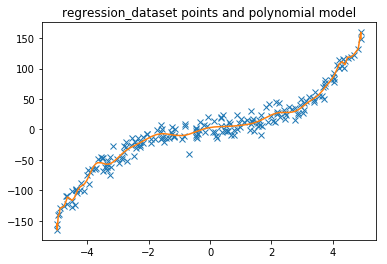

In [6]:
# Use the min_degree = 157 that makes fitting_error the smallest
a, fitting_error = do_regression(data_x, data_y, min_degree)
polynomial_coefficients = a


display(Markdown('***Fitting results(Polynomial)***'))
display(Markdown('The fitting error is ' +  '%f'%fitting_error))
display(Markdown('Fit looks much more sophisticated then the one with degree 3'))

plt.figure()
# we sort the data to make the plot pretty
plot_x = np.sort(data_x)
plt.plot(data_x, data_y, 'x')
f = a[0]
for i in range(1, min_degree+1):
    f += a[i]*plot_x**i
plt.plot(plot_x, f)
plt.title('regression_dataset points and polynomial model')
print('polynomial_coefficients( shape =',polynomial_coefficients.shape,')\n',polynomial_coefficients)

## Load regression_set2 and plot

Text(0.5, 1.0, 'regression_dataset2')

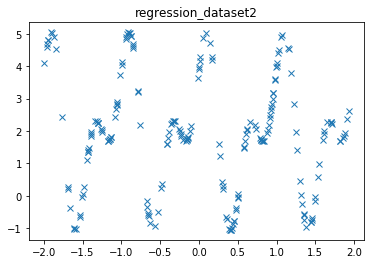

In [7]:
regression_data = np.loadtxt('regression_dataset2')
data_x = regression_data[:,0]
data_y = regression_data[:,1] 

plt.figure()
plt.plot(data_x, data_y, 'x')
plt.title('regression_dataset2')

In [8]:
def do_regression_periodic(data_x, data_y, degree,T=1):
    X = np.empty([len(data_x), (degree+1)*2])
    Y = np.empty([len(data_y)])
    # for each data point
    for i,x in enumerate(data_x):
        for j in range((degree+1)):
            X[i,j] = np.cos(j*T*2*np.pi*x)        # We need to do cos(0), cos(1*T*2pi*x), cos(2*T*2pi*x) ...
            X[i,degree+1+j] = np.sin(j*T*2*np.pi*x) # We need to do sin(0),sin(1*T*2pi*x),sin(2*T*2pi*x) ...
        Y[i] = data_y[i]
    
    #construct X^T X
    XTX = X.transpose().dot(X)
    a_b = np.linalg.lstsq(XTX, X.transpose().dot(Y))[0]
#     a = np.linalg.solve(XTX, X.transpose().dot(Y))
    fitting_error = (X.dot(a_b) - Y).dot(X.dot(a_b) - Y)
    
    return a_b, fitting_error

## Find Degree that makes fitting_error the smallest

In [9]:
# This cell takes around 1 minutes, since the min_degree is 3, you can reduce for loop until 10 to speed up
error_list = []
for i in range(300):
    _, fitting_error = do_regression_periodic(data_x, data_y, i)
    error_list.append(fitting_error)
    errors = np.array(error_list)
min_error = errors.min()
degree = 0
while errors[degree] != min_error:
    degree += 1
min_degree = degree
min_degree

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


3

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  del sys.path[0]


***Fitting results(Periodic Model)***

Fitting Error: 4.1184702228358855e-28


The fitting error is around 0.000000

Fitting error is close to 0, which means fit looks close to perfect

Text(0.5, 1.0, 'regression_dataset points and periodic model')

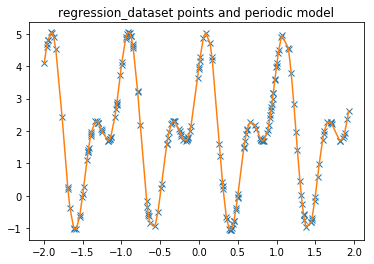

In [10]:
# fit the data that fitting_error gets smallest
b, fitting_error = do_regression_periodic(data_x, data_y, min_degree)

display(Markdown('***Fitting results(Periodic Model)***'))
print("Fitting Error:",fitting_error)
display(Markdown('The fitting error is around ' +  '%f'%fitting_error))
display(Markdown('Fitting error is close to 0, which means fit looks close to perfect'))

plt.figure()
# we sort the data to make the plot pretty
plot_x = np.sort(data_x)
plt.plot(data_x, data_y, 'x')

f = b[0] + b[0+1]*np.sin(0*1*2*np.pi*plot_x)
for i in range(1, degree+1):
    f += b[i]*np.cos(i*1*2*np.pi*plot_x) + b[degree+1+i]*np.sin(i*1*2*np.pi*plot_x)
plt.plot(plot_x, f)

plt.title('regression_dataset points and periodic model')